## Основы предобработки данных

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

np.set_printoptions(precision=3)
pd.set_option('precision', 3)

sns.set()

In [2]:
# pip install seaborn

### Загрузка данных и предварительный анализа

Dibetes dataset https://www.kaggle.com/uciml/pima-indians-diabetes-database 

In [3]:
diabetes_df = pd.read_csv('diabetes.csv', index_col=None)
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
diabetes_df.shape

(768, 9)

In [5]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Изучение и обработка количественных признаков

In [7]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


In [8]:
diabetes_df.var()

Pregnancies                    11.354
Glucose                      1022.248
BloodPressure                 374.647
SkinThickness                 254.473
Insulin                     13281.180
BMI                            62.160
DiabetesPedigreeFunction        0.110
Age                           138.303
Outcome                         0.227
dtype: float64

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Glucose'}>]], dtype=object)

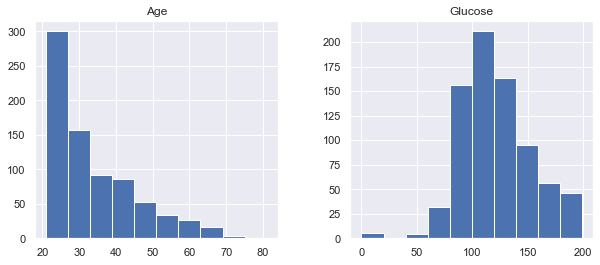

In [9]:
diabetes_df[['Age','Glucose']].hist(figsize=(10, 4))

Histograms vs. Kernel Density Estimation <br>
https://mglerner.github.io/posts/histograms-and-kernel-density-estimation-kde-2.html?p=28 

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

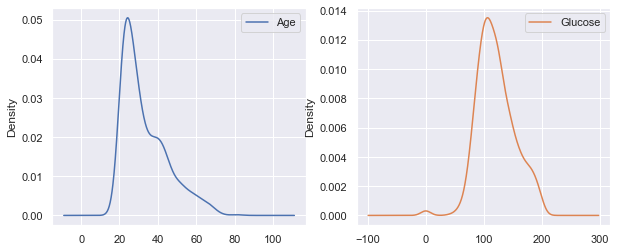

In [10]:
diabetes_df[['Age','Glucose']].plot(kind='density', layout=(1, 2), subplots=True,
                                    figsize=(10, 4), sharex=False)

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

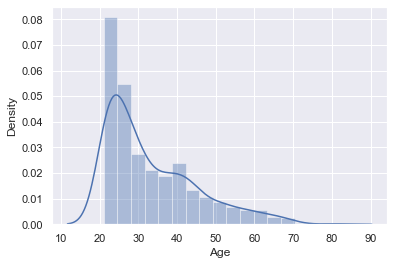

In [11]:
sns.distplot(diabetes_df['Age'])

### Обработка выбросов

<AxesSubplot:xlabel='Insulin'>

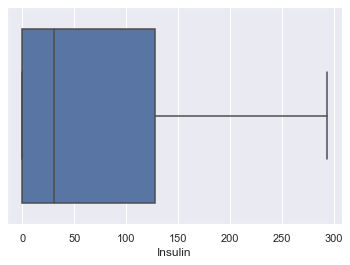

In [16]:
sns.boxplot(x='Insulin', data=diabetes_df)

<AxesSubplot:>

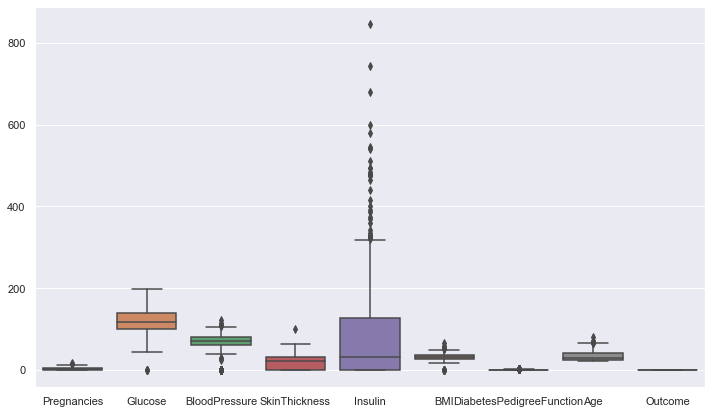

In [13]:
plt.subplots(figsize=(12,7))
sns.boxplot(data=diabetes_df)

In [14]:
diabetes_df['Insulin'] = diabetes_df.Insulin.clip(lower=diabetes_df.Insulin.quantile(0.05), 
                                                  upper=diabetes_df.Insulin.quantile(0.95))

<AxesSubplot:>

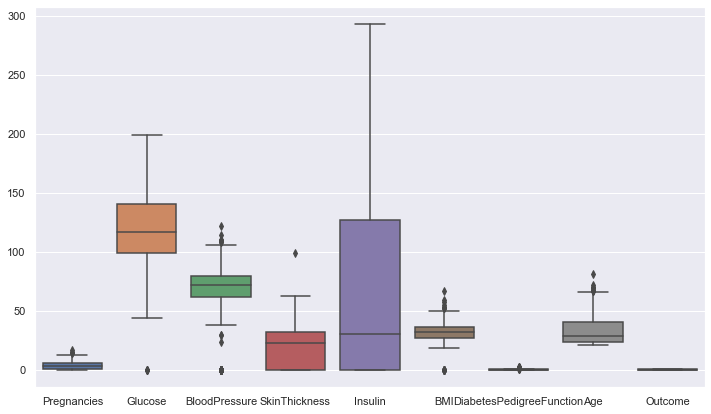

In [15]:
plt.subplots(figsize=(12,7))
sns.boxplot(data=diabetes_df)

### Обработка пропущенных значений

#### Поиск пропусков

In [ ]:
no_zero_columns = list (set(diabetes_df.columns) -  set(['Outcome','Pregnancies']))

In [ ]:
(diabetes_df[no_zero_columns] == 0).sum()

In [ ]:
diabetes_df.loc[:, no_zero_columns] = diabetes_df[no_zero_columns].replace(0, np.NaN)
diabetes_df.head()

In [ ]:
diabetes_df.isnull().sum()

In [ ]:
diabetes_df.describe()

In [ ]:
plt.subplots(figsize=(12,7))
sns.boxplot(data=diabetes_df)

#### Работа с пропусками

In [ ]:
# "Плохие" способы:

    # Удаляем строки
print (diabetes_df.dropna(how='any', axis=0).shape)

    # Удаляем столбцы
print (diabetes_df.dropna(how='any', axis=1).shape)

In [ ]:
diabetes_df.isnull().mean()

In [ ]:
# Удалить столбцы, в которых много пропущенных значение
diabetes_df.loc[:, diabetes_df.isnull().mean() < .25].shape

In [ ]:
# Заполняем произвольным значением

diabetes_df.fillna(-1).head()

In [ ]:
diabetes_df.fillna(diabetes_df.mean(), inplace=True)

# diabetes_df['Glucose'].fillna((diabetes['Glucose']).mode()[0], inplace=True)
# diabetes_df['BMI'].fillna((diabetes['BMI']).mean(), inplace=True)
# diabetes_df['Insulin'].fillna((diabetes['Insulin']).median(), inplace=True)

diabetes_df.isnull().sum()

### Дискретизация данных (binning)

In [ ]:
# Equal-width partitioning

diabetes_df['Age_equal'] = pd.cut(diabetes_df['Age'], 5)
diabetes_df.head()

In [ ]:
# Expert partitioning

bins = [0,12,19,35,60,100]
group_names = ['Child', 'Teenager', 'Young', 'Adult','Elderly']
diabetes_df['Age_expert'] = pd.cut(diabetes_df['Age'], bins, labels=group_names)
diabetes_df.head(5)

### Изучение категориальных и бинарных признаков

In [ ]:
diabetes_df['Outcome'].value_counts()

In [ ]:
diabetes_df['Age_equal'].value_counts()

In [ ]:
diabetes_df['Age_expert'].value_counts()

In [ ]:
diabetes_df['Outcome'].hist(figsize=(10, 4))

In [ ]:
diabetes_df['Outcome'].value_counts().plot(kind='bar')

In [ ]:
sns.countplot(x='Outcome', data=diabetes_df)

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

sns.countplot(x='Age_expert', data=diabetes_df, ax=axes[0])
sns.countplot(x='Age_equal', data=diabetes_df, ax=axes[1])

### Изчение взаимодействия признаков

#### Только количественные признаки

In [ ]:
plt.scatter(diabetes_df['Glucose'], diabetes_df['Insulin'], color='red')
plt.title('Glucose and Insulin')
plt.xlabel('Glucose')
plt.ylabel('Insulin')

In [ ]:
sns.jointplot(x='Glucose', y='Insulin', data=diabetes_df, kind='scatter', color='orange')


In [ ]:
num_columns = list(set(diabetes_df.columns) -  set(['Outcome','Age_expert','Age_equal']))
sns.pairplot(diabetes_df[num_columns])

In [ ]:
corr_matrix = diabetes_df[num_columns].corr()
corr_matrix

In [ ]:
sns.heatmap(corr_matrix, annot=True, annot_kws={"size":12})

#### Количественные и качественные признаки

In [ ]:
diabetes_df.pivot_table(['Glucose', 'Insulin'],['Outcome'], aggfunc='mean')

In [ ]:
sns.boxplot(x='Outcome', y='Glucose', data=diabetes_df)

In [ ]:
sns.lmplot('Glucose', 'Insulin', data=diabetes_df, hue='Outcome', fit_reg=False);

#### Только качественные признаки

In [ ]:
pd.crosstab(diabetes_df['Age_equal'], diabetes_df['Outcome'], margins=True)

In [ ]:
sns.countplot(x='Age_equal', hue='Outcome', data=diabetes_df)

### Нормализация данных

In [ ]:
diabetes_df[['DiabetesPedigreeFunction','Insulin']].plot(kind='density', layout=(1, 2), sharex=False, figsize=(10, 4))

In [ ]:
sns.boxplot(data=diabetes_df[['DiabetesPedigreeFunction', 'Insulin']])

In [ ]:
std_scaler = StandardScaler().fit(diabetes_df[['DiabetesPedigreeFunction','Insulin']])

cols_std_scaled = std_scaler.transform(diabetes_df[['DiabetesPedigreeFunction','Insulin']])

minmax_scaler = MinMaxScaler().fit(diabetes_df[['DiabetesPedigreeFunction','Insulin']])

cols_minmax_scaled = minmax_scaler.transform(diabetes_df[['DiabetesPedigreeFunction','Insulin']])

type(cols_std_scaled)

In [ ]:
print('Mean after standardization:\nDiabetesPedigreeFunction={:.2f}, Insulin={:.2f}'
      .format(cols_std_scaled[:,0].mean(), cols_std_scaled[:,1].mean()))
print('\nStandard deviation after standardization:\nGlucose={:.2f}, Insulin={:.2f}\n'
      .format(cols_std_scaled[:,0].std(), cols_std_scaled[:,1].std()))

print('Mean after min-max scaling:\nDiabetesPedigreeFunction={:.2f}, Insulin={:.2f}'
      .format(cols_minmax_scaled[:,0].mean(), cols_minmax_scaled[:,1].mean()))
print('\nStandard deviation after min-max scaling:\nDiabetesPedigreeFunction={:.2f}, Insulin={:.2f}'
      .format(cols_minmax_scaled[:,0].std(), cols_minmax_scaled[:,1].std()))

In [ ]:
plt.figure(figsize=(8,6))
#plt.scatter(diabetes_df['DiabetesPedigreeFunction'], diabetes_df['Insulin'], color='orange', label='input scale', alpha=0.5)  
plt.scatter(cols_std_scaled[:,0], cols_std_scaled[:,1], color='red', label='Standardized', alpha=0.3)
plt.scatter(cols_minmax_scaled[:,0], cols_minmax_scaled[:,1],color='blue', label='Min-max scaling ', alpha=0.3)
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Insulin')
plt.legend(loc='upper left')


In [ ]:
diabetes_df_scaled = pd.DataFrame(cols_std_scaled, columns = ['DiabetesPedigreeFunction', 'Insulin'])

diabetes_df_scaled[['DiabetesPedigreeFunction','Insulin']].plot(kind='density', layout=(1, 2), sharex=False, figsize=(10, 4))

In [ ]:
sns.boxplot(data=diabetes_df_scaled[['DiabetesPedigreeFunction', 'Insulin']])